In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('train.csv')

In [3]:
# Use DataFrame.head() and DataFrame.tail() to view the top and bottom rows of the frame respectively:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


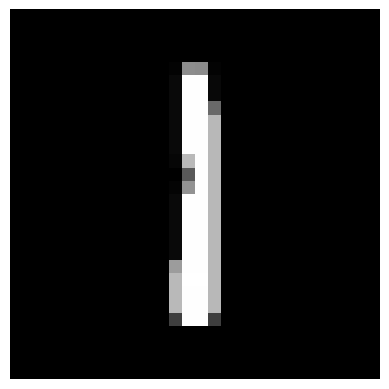

In [6]:
data = np.array(data)

def plot_mnist_image(image_array):
    image = image_array.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Turn off axis
    plt.show()

plot_mnist_image(data[2, 1:])

In [8]:
m, n = data.shape
print(m,n)

42000 785


In [9]:
np.random.shuffle(data) # Shuffles all the individual rows
data_dev = data[0:1000].T #Take the first 1000 rows, and transpose the matrix to get 1000 examples as column vectors
data_dev

array([[1, 8, 9, ..., 7, 2, 3],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
Y_dev = data_dev[0] #Takes the first row, which contains all of the answers to the numbers (the Y is what we want)

In [12]:
X_dev = data_dev[1:]

In [20]:
X_dev = X_dev.reshape(28,28,1000)
print(X_dev.shape)

(28, 28, 1000)


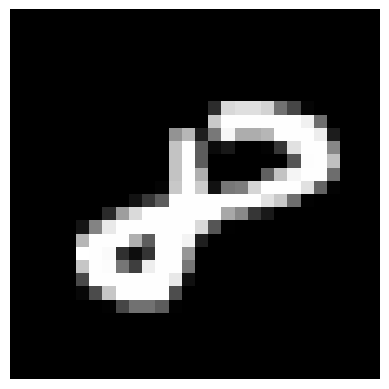

8


In [33]:
# print(X_dev[:,:,1])
plot_mnist_image(X_dev[:,:,1])
print(Y_dev[1])

In [22]:
X_dev = X_dev / 255.

In [25]:
data_train = data[1000:m].T
Y_train = data_train[0]

In [32]:
X_train= data_train[1:n] #Takes all of the data corresponding to all of the entries
X_train = X_train.reshape(28,28,41000)
X_train = X_train / 255.